In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import*
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from google.colab import drive
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('customer_purchase_data.csv')

In [ ]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [ ]:
df.shape

(1500, 9)

In [ ]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [ ]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [ ]:
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

In [ ]:
print(df['PurchaseStatus'].value_counts())

PurchaseStatus
0    852
1    648
Name: count, dtype: int64


# Preprosessing

In [ ]:
# Scoping the df
listnew= ['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus']
scoped_df = df[listnew]
# scoped_df = df[['Species', 'Soil', 'Light_Cat', 'Event']]


In [ ]:
scoped_df.head(3)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

def encode_one_hot():
    # One hot encoding
    encoder = OneHotEncoder()
    categorical_columns = ['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed']
    encoded_data = encoder.fit_transform(scoped_df[categorical_columns]).toarray()
    # Create column names
    encoded_columns = []
    for i, category in enumerate(encoder.categories_):
        encoded_columns.extend([f"{categorical_columns[i]}_{cat}" for cat in category])
    # print(encoded_columns)

    encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
    encoded_df['PurchaseStatus'] = scoped_df['PurchaseStatus'].values
    return encoded_df

In [ ]:
encoded_df = encode_one_hot()

# Modeling

In [ ]:
y = encoded_df['PurchaseStatus']
X = encoded_df.drop('PurchaseStatus', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X)

In [ ]:
from pycaret.classification import setup

# s = setup(data = encoded_df, target = 'Alive', session_id=123)
s = setup(
      data=encoded_df,
          target='PurchaseStatus',
              train_size=0.8,
                  normalize=True,
                      normalize_method='minmax',
                          remove_outliers=True,
                              outliers_threshold=0.05,
                                  polynomial_features=False,
                                      feature_selection=False,session_id=456)


,Description,Value
0,Session id,456
1,Target,PurchaseStatus
2,Target type,Binary
3,Original data shape,"(1500, 2866)"
4,Transformed data shape,"(1440, 2866)"
5,Transformed train set shape,"(1140, 2866)"
6,Transformed test set shape,"(300, 2866)"
7,Numeric features,2865
8,Preprocess,True
9,Imputation type,simple


In [ ]:
models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7817,0.8782,0.7123,0.7667,0.7375,0.5512,0.5533,0.6920
lr,Logistic Regression,0.7792,0.8699,0.7084,0.7658,0.7341,0.5460,0.5491,1.3060
lightgbm,Light Gradient Boosting Machine,0.7683,0.8227,0.7258,0.7375,0.7295,0.5272,0.5296,0.7220
ada,Ada Boost Classifier,0.7675,0.8362,0.7201,0.7397,0.7278,0.5252,0.5275,0.9000
svm,SVM - Linear Kernel,0.7642,0.8635,0.6928,0.7521,0.7129,0.5145,0.5223,0.7730
et,Extra Trees Classifier,0.7608,0.8507,0.6737,0.7496,0.7078,0.5066,0.5103,1.2190
rf,Random Forest Classifier,0.7525,0.8417,0.6236,0.7626,0.6833,0.4841,0.4928,1.2020
gbc,Gradient Boosting Classifier,0.7500,0.8311,0.6894,0.7233,0.7027,0.4878,0.4912,1.7970
dt,Decision Tree Classifier,0.7133,0.7083,0.6717,0.6647,0.6671,0.4156,0.4167,0.7390
knn,K Neighbors Classifier,0.6800,0.7300,0.5579,0.6511,0.5988,0.3360,0.3401,0.9120


In [ ]:
best_model = automl(optimize='Accuracy')



In [ ]:
best_model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=456, solver='auto',
                tol=0.0001)

In [ ]:
custom_grid = {
    'alpha': [0.1, 0.5,1.0, 10.0],    # Example values for the regularization strength
    'max_iter': [100, 500, 1000]  # Example values for maximum iterations
}

tuned_best_model = tune_model(best_model, custom_grid=custom_grid)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7750,0.8565,0.7255,0.7400,0.7327,0.5385,0.5385
1,0.7667,0.8653,0.6863,0.7447,0.7143,0.5177,0.5189
2,0.7833,0.8829,0.6538,0.8095,0.7234,0.5486,0.5571
3,0.8000,0.8914,0.7115,0.8043,0.7551,0.5872,0.5903
4,0.7833,0.8911,0.7308,0.7600,0.7451,0.5568,0.5571
5,0.8000,0.8903,0.7885,0.7593,0.7736,0.5946,0.5949
6,0.8083,0.9061,0.7308,0.8085,0.7677,0.6053,0.6075
7,0.7250,0.8385,0.6538,0.6939,0.6733,0.4362,0.4368
8,0.8083,0.8992,0.7692,0.7843,0.7767,0.6088,0.6089


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_best_model

RidgeClassifier(alpha=0.1, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=500, positive=False, random_state=456, solver='auto',
                tol=0.0001)

In [ ]:
predictions = predict_model(tuned_best_model, data = X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = predictions.prediction_label.tolist()
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       172
           1       0.94      0.91      0.93       128

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

Accuracy: 0.94


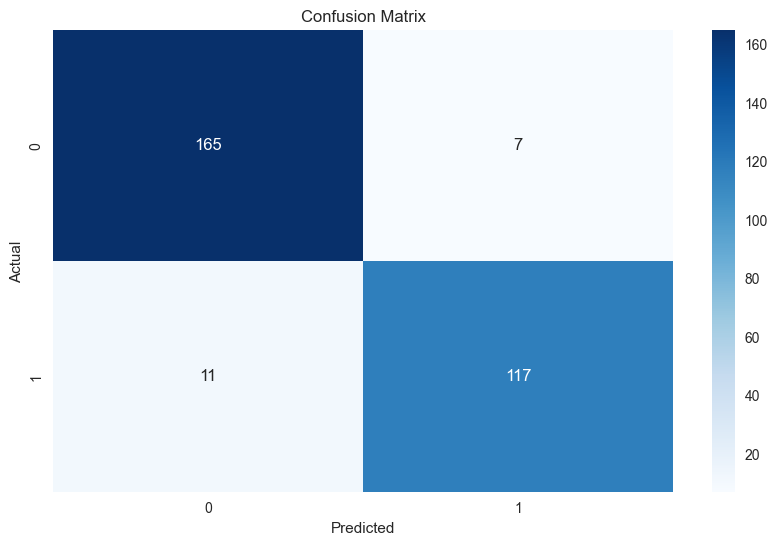

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Train ROC-AUC Score: 0.9861001131221719
Test ROC-AUC Score: 0.9861464389534884


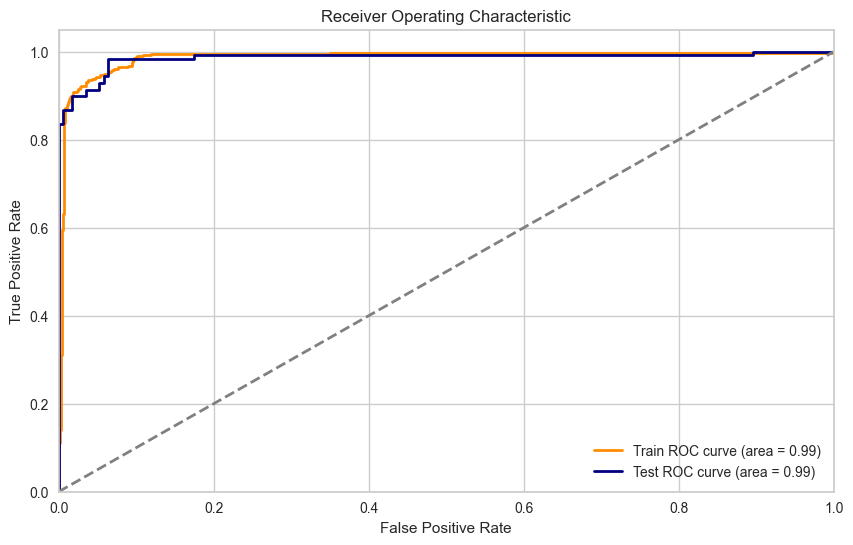

In [ ]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'best_model' is your trained model
y_train_pred_proba = best_model.decision_function(X_train) #[:, 1]
y_test_pred_proba = best_model.decision_function(X_test) #[:, 1]

# Compute ROC curve and AUC for train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

print(f"Train ROC-AUC Score: {roc_auc_train}")
print(f"Test ROC-AUC Score: {roc_auc_test}")


# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='navy', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Cek Overfitting
overfitting_status = roc_auc_train - roc_auc_test
if overfitting_status > 0.05:
    print("Model mungkin overfitting (perbedaan ROC-AUC > 0.05).")
else:
    print("Model tidak overfitting.")

Model tidak overfitting.


# Tuning dengan GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
# Definisikan grid hyperparameter
param_grid = {
    # 'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularisasi parameter (lebih banyak nilai)
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algoritma optimasi (menambahkan 'sag' dan 'saga')
    'max_iter': [100, 200, 300, 500],  # Maksimum iterasi (menambahkan nilai yang lebih besar)
    #'penalty': ['l2', 'none'],  # Penalti regularisasi (menambahkan 'none' untuk tanpa penalti)
    'tol': [0.0001, 0.00001, 0.000001],  # Toleransi untuk menghentikan kriteria
    #'fit_intercept': [True, False],  # Apakah model akan menghitung intercept atau tidak
    #'class_weight': [None, 'balanced'],  # Memberikan bobot yang lebih tinggi pada kelas yang kurang umum
    # 'multi_class': ['auto', 'ovr', 'multinomial'],  # Jenis klasifikasi (untuk data multi-kelas)
    #'warm_start': [True, False],  # Jika True, menggunakan solusi sebelumnya sebagai titik awal
    # 'l1_ratio': [None, 0.1, 0.5, 0.7, 1.0]
}
ridgeclassifier = RidgeClassifier()
grid_search = GridSearchCV(estimator=ridgeclassifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Lakukan Grid Search
grid_search.fit(X_train, y_train)

# Output hasil terbaik
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluasi model dengan parameter terbaik di data uji
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Accuracy:", test_score)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters: {'max_iter': 100, 'solver': 'sag', 'tol': 0.0001}
Best Accuracy: 0.7825
Test Accuracy: 0.7866666666666666


In [ ]:
rdcl= RidgeClassifier(alpha=0.1, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=500, positive=False, random_state=456, solver='auto',
                tol=0.0001)
rdcl.fit(X_test,y_pred)
prediksi = predict_model(rdcl, data = X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = prediksi.prediction_label.tolist()
akurasi = accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Accuracy:", akurasi)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       172
           1       0.94      0.91      0.93       128

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

Accuracy: 0.94
